In [1]:
import pandas as pd
import numpy as np

Things to Answer:

- Effectively Parking at UCSD, Best time to arrive to park 
- Busiest/Least busiest parking structure/parking area

In [2]:
# data extraction
data_summer = pd.read_excel("data/2022-2023_Summer.xlsx", "Summer 2022 Structures")
data_fall = pd.read_excel("data/2022-2023_Fall.xlsx", "Fall 2022 Structures")
data_winter = pd.read_excel("data/2022-2023_Winter.xlsx", "By Structure")
data_spring = pd.read_excel("data/2022-2023_Spring.xlsx", "ByStructurePivotTable")

In [3]:
def change_structure(df, start):
    start_index = df[df['Structure'] == start].index[0]
    end_index = df[df['Structure'] == str(start + " Total")].index[0]
    df.loc[start_index:end_index, 'Structure'] = df.loc[start_index:end_index, 'Structure'].fillna(start)

In [4]:
# summer
# getting the column name
index_column = data_summer.iloc[4, :].tolist()

# exclude the old header
data_summer = data_summer.iloc[5:, :]
data_summer.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_summer, "Athena")
change_structure(data_summer, "Campus Point East")
change_structure(data_summer, "Campus Point West")
change_structure(data_summer, "Gilman")
change_structure(data_summer, "Hopkins")
change_structure(data_summer, "Medical Center Hillcrest")
change_structure(data_summer, "Nuevo West/Vela")
change_structure(data_summer, "Pangea")
change_structure(data_summer, "Scholars")
change_structure(data_summer, "South Parking Structure")
change_structure(data_summer, "Torrey Pines Center North")
data_summer = data_summer.reset_index(drop=True)
# data_summer

In [5]:
# fall
# getting the column name

index_column = data_fall.iloc[4, :].tolist()

# exclude the old header
data_fall = data_fall.iloc[5:, :]
data_fall.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_fall, "Athena")
change_structure(data_fall, "Campus Point East")
change_structure(data_fall, "Campus Point West")
change_structure(data_fall, "Gilman")
change_structure(data_fall, "Hopkins")
change_structure(data_fall, "Medical Center Hillcrest")
change_structure(data_fall, "Nuevo West/Vela")
change_structure(data_fall, "Pangea")
change_structure(data_fall, "Scholars")
change_structure(data_fall, "South Parking Structure")
change_structure(data_fall, "Torrey Pines Center North")
data_fall = data_fall.reset_index(drop=True)
# data_fall

In [6]:
# winter
# getting the column name

index_column = data_winter.iloc[3, 1:].tolist()

# exclude the old header
data_winter = data_winter.iloc[4:, 1:]
data_winter.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_winter, "Arbor")
change_structure(data_winter, "Athena")
change_structure(data_winter, "Bachman")
change_structure(data_winter, "Campus Point East")
change_structure(data_winter, "Campus Point West")
change_structure(data_winter, "Gilman")
change_structure(data_winter, "Hopkins")
change_structure(data_winter, "Nuevo West/Vela")
change_structure(data_winter, "Pangea")
change_structure(data_winter, "Scholars")
change_structure(data_winter, "South")
change_structure(data_winter, "Torrey Pines Center North")
change_structure(data_winter, "Torrey Pines Center South")
data_winter = data_winter.reset_index(drop=True)
data_winter = data_winter.drop(columns="Space Subtype")
# data_winter

In [7]:
# spring
# getting the column name

index_column = data_spring.iloc[1, :].tolist()

# exclude the old header
data_spring = data_spring.iloc[2:, :]
data_spring.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_spring, "Arbor")
change_structure(data_spring, "Athena")
change_structure(data_spring, "Bachman")
change_structure(data_spring, "Campus Point East")
change_structure(data_spring, "Campus Point West")
change_structure(data_spring, "Gilman")
change_structure(data_spring, "Hopkins")
change_structure(data_spring, "Nuevo West/Vela")
change_structure(data_spring, "Pangea")
change_structure(data_spring, "Scholars")
change_structure(data_spring, "South")
change_structure(data_spring, "Torrey Pines Center North")
change_structure(data_spring, "Torrey Pines Center South")
data_spring = data_spring.reset_index(drop=True)
# data_spring

In [8]:
data_fall.loc[:, "quarter"] = "fall"
data_winter.loc[:, "quarter"] = "winter"
data_spring.loc[:, "quarter"] = "spring"
data_summer.loc[:, "quarter"] = "summer"

In [9]:
data_winter.columns = ['Structure', 'SpaceType', 'Sum of Inventory', 'Sum of 8am',
       'Sum of 9am', 'Sum of 10am', 'Sum of 11am', 'Sum of 12pm', 'Sum of 1pm',
       'Sum of 2pm', 'Sum of 3pm', 'Sum of 4pm', 'Sum of 5pm',
       'Min of EmptyCalc', 'Sum of OccupiedCalc', 'Sum of PercentCalc',
       'quarter']
data_spring.columns = ['Structure', 'SpaceType', 'Sum of Inventory', 'Sum of 8am',
       'Sum of 9am', 'Sum of 10am', 'Sum of 11am', 'Sum of 12pm', 'Sum of 1pm',
       'Sum of 2pm', 'Sum of 3pm', 'Sum of 4pm', 'Sum of 5pm',
       'Min of EmptyCalc', 'Sum of OccupiedCalc', 'Sum of PercentCalc',
       'quarter']

In [10]:
df = pd.concat([data_fall, data_winter, data_spring, data_summer])
# df

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [61]:
times = ['8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm']

grouped_structures = df.groupby('Structure').agg({**{'Sum of ' + time: 'sum' for time in times}, 'Sum of Inventory': 'sum'}).reset_index()

for time in times:
    vacancy_col = 'Sum of ' + time
    inventory_col = 'Sum of Inventory'
    rate_col = "Vacancy Rate at " + time

    grouped_structures[rate_col] = grouped_structures.apply(lambda row: row[vacancy_col] / row[inventory_col] if row[inventory_col] > 0 else 0, axis=1)

    grouped_structures[rate_col] = pd.to_numeric(grouped_structures[rate_col], errors='coerce')

grouped_structures = grouped_structures[~grouped_structures['Structure'].str.contains("Total")]

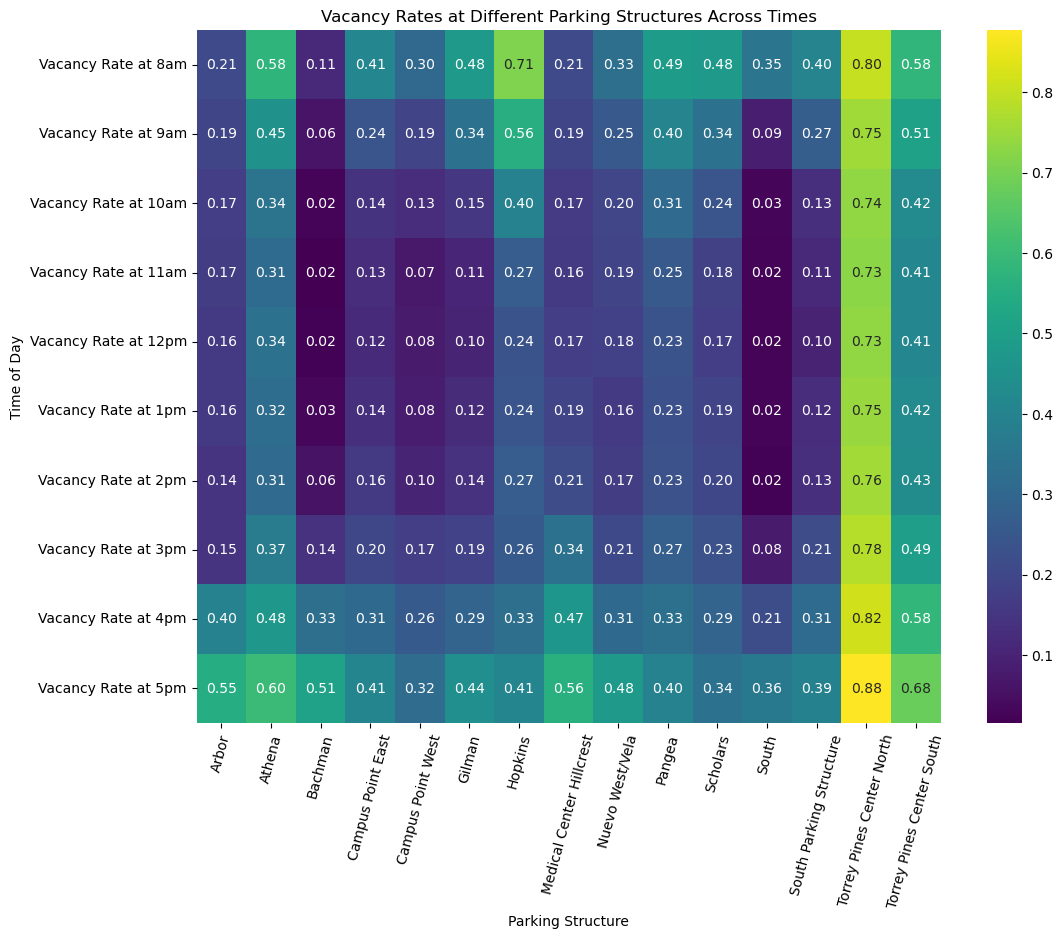

In [62]:
df_filtered = grouped_structures[grouped_structures['Structure'].notna() & (grouped_structures['Structure'] != '')]

#heatmap of parking vacancies across times vs. parking structures
times_rates = ['Vacancy Rate at 8am', 'Vacancy Rate at 9am', 'Vacancy Rate at 10am', 'Vacancy Rate at 11am', 'Vacancy Rate at 12pm', 'Vacancy Rate at 1pm', 'Vacancy Rate at 2pm', 'Vacancy Rate at 3pm', 'Vacancy Rate at 4pm', 'Vacancy Rate at 5pm']
times_sums = ['Sum of 8am','Sum of 9am','Sum of 10am','Sum of 11am','Sum of 12pm','Sum of 1pm','Sum of 2pm','Sum of 3pm','Sum of 4pm','Sum of 5pm']

vacancy_data_struct = df_filtered.groupby('Structure')[times_rates].mean().T

#alignment of parkign structure labels is off due to a matplotlib bug
plt.figure(figsize=(12, 9))
sns.heatmap(vacancy_data_struct, cmap="viridis", annot=True, fmt=".2f")
plt.title('Vacancy Rates at Different Parking Structures Across Times')
plt.xlabel('Parking Structure')
plt.ylabel('Time of Day')
plt.xticks(rotation=75)
plt.show()

Observations:

Athena is the busiest parking structure, overall. 
Null Hypothesis: All parking structures are equally busy. 
Alternate: Athena is significantly busier than any other parking spot.

Questions:

1. Instead of running a bunch of z tests with all the pairwise comparisons of Athena with every other structure. Is there a way we can just run one test that compares Athena with the all the others together. 
2. Note: this is a graph of occupancy not rate so high occupancy could possibly mean least busiest/ crowded too. 

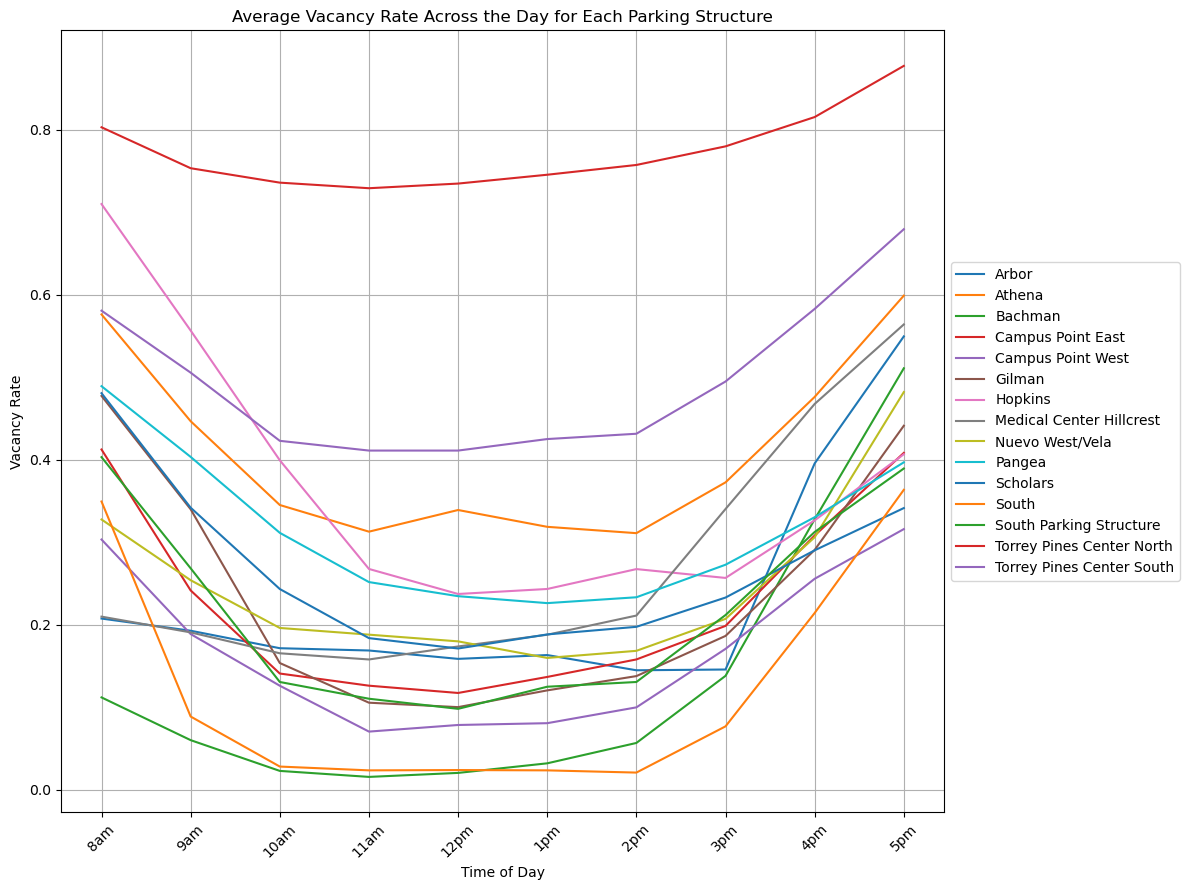

In [63]:
#linear graph of parking vacancy rates across times vs. parking structures
plt.figure(figsize=(12, 9))

for struct in grouped_structures['Structure'].unique():
    df_type2 = grouped_structures[grouped_structures['Structure'] == struct]

    vacancy_rates = df_type2[times_rates].mean()
    plt.plot(times, vacancy_rates, label=struct)

plt.title('Average Vacancy Rate Across the Day for Each Parking Structure')
plt.xlabel('Time of Day')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/3241279056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)
/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/3241279056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='inferno')


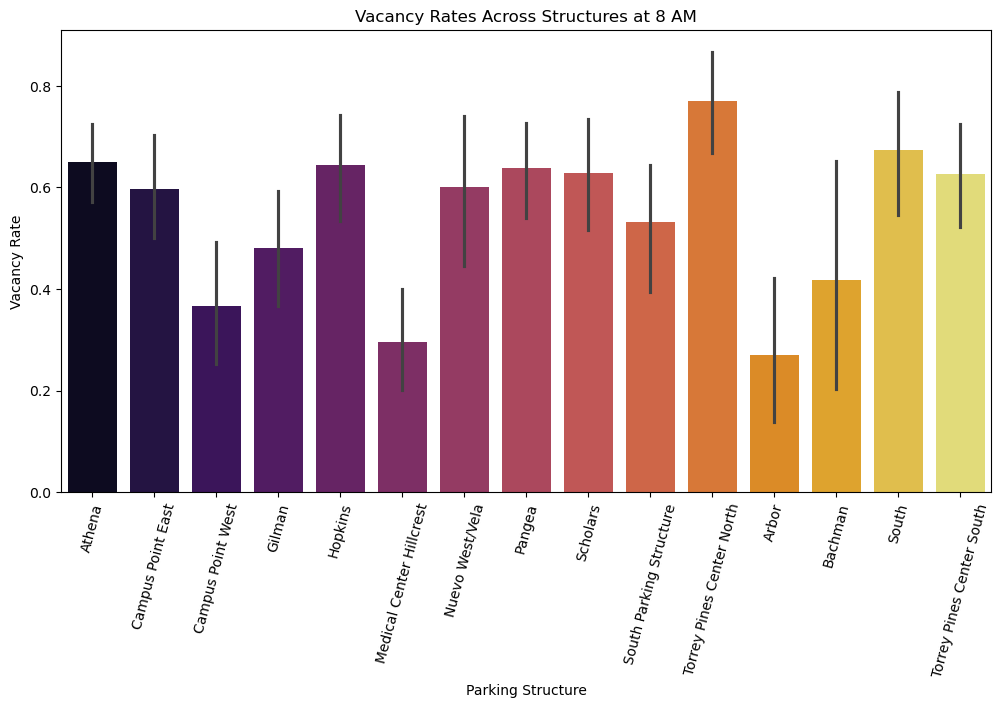

In [77]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 8am'].notnull()]

# Plotting the boxplot for occupancy rates at 8 am across structures
plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='inferno')
plt.title('Vacancy Rates Across Structures at 8 AM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()


/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/1258507424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)
/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/1258507424.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='inferno')


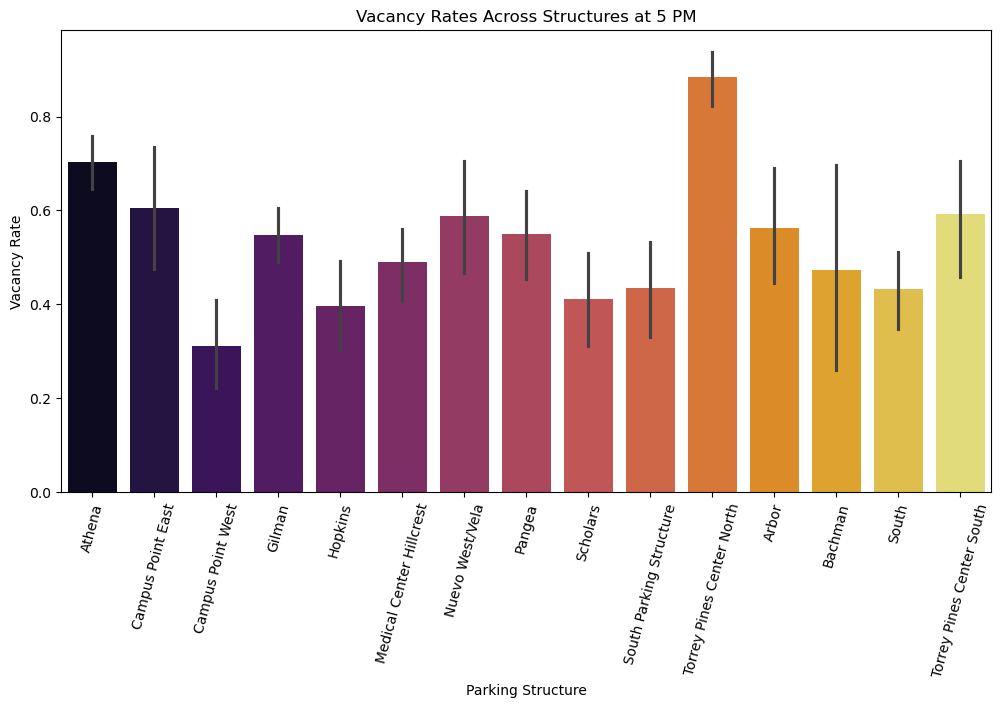

In [76]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 5pm'].notnull()]

# Plotting the boxplot for occupancy rates at 8 am across structures
plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='inferno')
plt.title('Vacancy Rates Across Structures at 5 PM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()

In [65]:
grouped_spots = df.groupby('SpaceType').agg({**{'Sum of ' + time: 'sum' for time in times}, 'Sum of Inventory': 'sum'}).reset_index()

# Then calculate the occupancy rate for each structure and time
for time in times:
    vacancy_col = 'Sum of ' + time
    inventory_col = 'Sum of Inventory'
    rate_col = "Vacancy Rate at " + time

    # Calculate occupancy rate
    grouped_spots[rate_col] = grouped_spots.apply(lambda row: row[vacancy_col] / row[inventory_col] if row[inventory_col] > 0 else 0, axis=1)

    # Convert to numeric, coerce errors to NaN (which you can then fill or handle as you wish)
    grouped_spots[rate_col] = pd.to_numeric(grouped_spots[rate_col], errors='coerce')

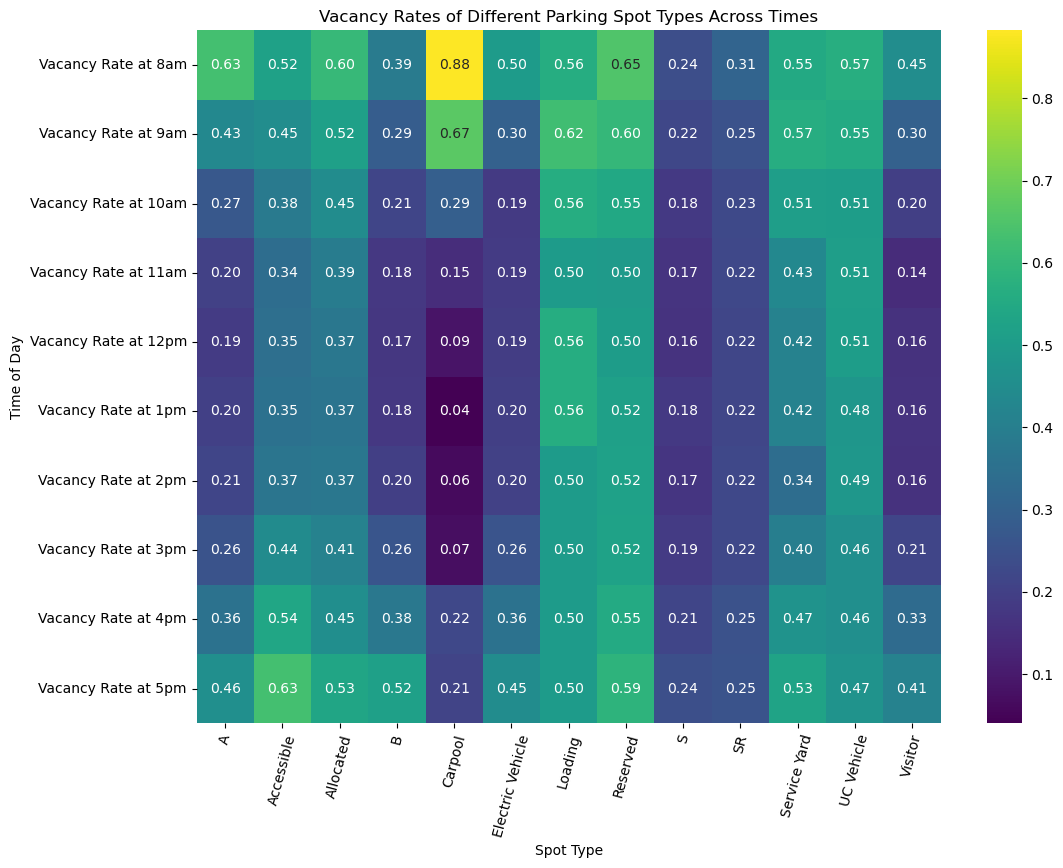

In [66]:
#heatmap of parking vacancies across times vs. space types
df_filtered_2 = grouped_spots[grouped_spots['SpaceType'].notna() & (grouped_spots['SpaceType'] != '')]

vacancy_data_space = df_filtered_2.groupby('SpaceType')[times_rates].mean().T

#alignment of parkign structure labels is off due to a matplotlib bug
plt.figure(figsize=(12, 9))
sns.heatmap(vacancy_data_space, cmap="viridis", annot=True, fmt=".2f")
plt.title('Vacancy Rates of Different Parking Spot Types Across Times')
plt.xlabel('Spot Type')
plt.ylabel('Time of Day')
plt.xticks(rotation=75)
plt.show()

Observations:

B is the busiest parking spot type, overall. 
Null Hypothesis: All spot types are equally busy. 
Alternate: B is significantly busier than any other parking spot type.

Doubts:

1. Instead of running a bunch of z tests with all the pairwise comparisons of B with every other structure. Is there a way we can just run one test that compares B with the all the others together. 
2. Note: this is a graph of occupancy not rate so high occupancy could possibly mean least busiest/ crowded too. 

Possible reasons:

1. that thing Sidharth said about being in a group of grad students where all those license plates are valid for parking or something like that. 

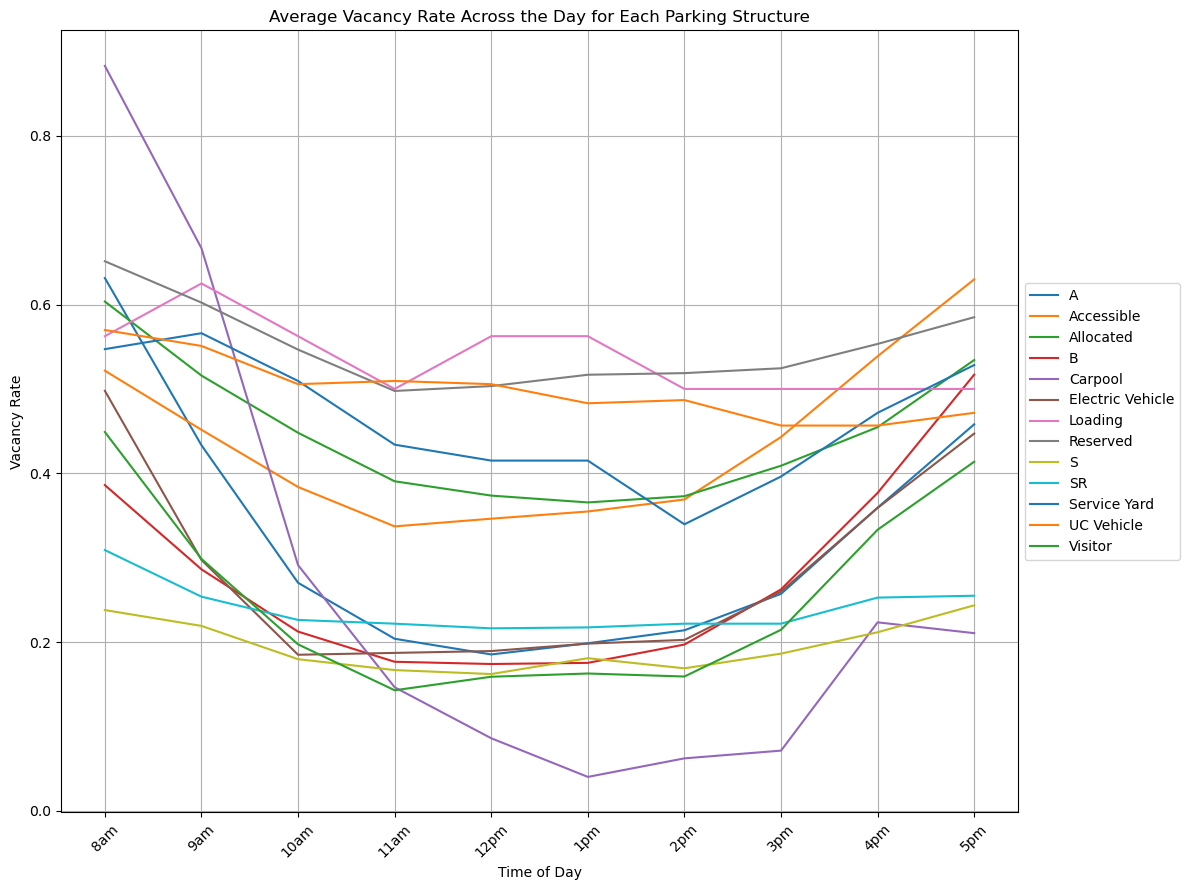

In [67]:
#linear graph of parking vacancy rates across times vs. parking structures
plt.figure(figsize=(12, 9))

for struct in grouped_spots['SpaceType'].unique():
    df_type2 = grouped_spots[grouped_spots['SpaceType'] == struct]

    vacancy_rates = df_type2[times_rates].mean()
    plt.plot(times, vacancy_rates, label=struct)

plt.title('Average Vacancy Rate Across the Day for Each Parking Structure')
plt.xlabel('Time of Day')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/1606464084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)
/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/1606464084.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='Spectral')


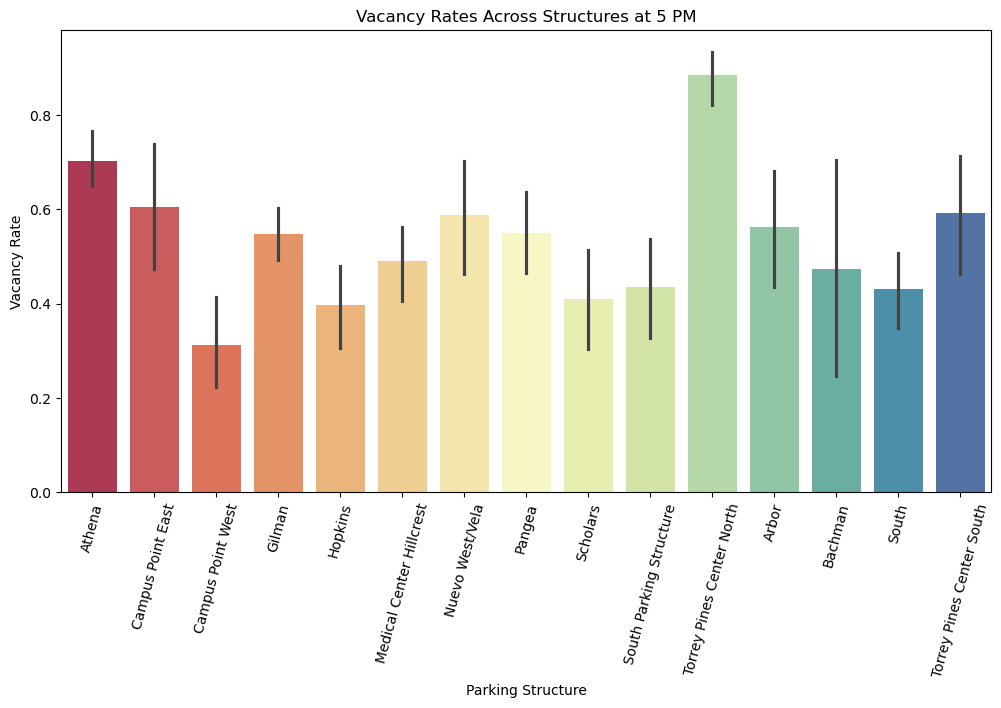

In [70]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 5pm'].notnull()]

plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='Spectral')
plt.title('Vacancy Rates Across Structures at 5 PM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()


/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/3744956108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)
/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_7916/3744956108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='Spectral')


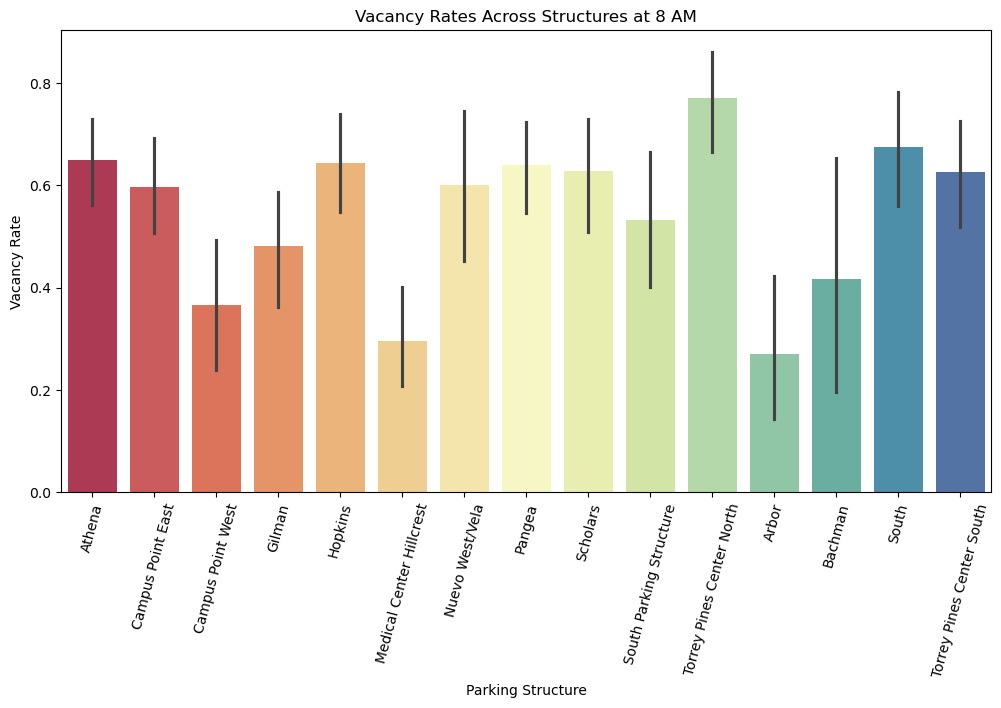

In [71]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 8am'].notnull()]

plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='Spectral')
plt.title('Vacancy Rates Across Structures at 8 AM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()
